# Exercise

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("bhp.csv")
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11977,Thanisandra,1 BHK,663.0,1.0,32.82,1,4950
13154,Budigere,2 BHK,1153.0,2.0,60.00,2,5203
11278,Thanisandra,3 BHK,1698.0,3.0,125.00,3,7361
11211,Bannerghatta Road,3 BHK,1550.0,3.0,96.00,3,6193
10831,Hebbal,3 BHK,1255.0,3.0,77.68,3,6189


In [3]:
# (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

max_threshold = df["price_per_sqft"].quantile(0.999)

max_threshold

50959.36200000098

In [4]:
min_threshold = df["price_per_sqft"].quantile(0.001)

min_threshold

1366.184

In [5]:
df_outliers_1 = df[(df["price_per_sqft"]<min_threshold) | (df["price_per_sqft"]>max_threshold)]

df_outliers_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [6]:
df.shape

(13200, 7)

In [7]:
df_outliers_1.shape

(28, 7)

In [9]:
df_no_outliers_1 = df[(df["price_per_sqft"]>=min_threshold) & (df["price_per_sqft"]<=max_threshold)]

df_no_outliers_1.shape

(13172, 7)

We removed 28 outliers

In [10]:
df_no_outliers_1.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12929,Sarjapur Road,3 BHK,1984.0,4.0,148.00,3,7459
967,Jakkur,3 BHK,1396.0,2.0,86.51,3,6196
9940,Mahadevpura,3 BHK,1505.0,3.0,78.00,3,5182
9931,other,2 Bedroom,1200.0,2.0,75.00,2,6250
9887,other,3 BHK,1250.0,3.0,40.00,3,3200


In [13]:
# (3) On step(2) dataframe, use 4 standard deviation to remove outliers

df_no_outliers_1["price_per_sqft"].describe()


count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [14]:
max_threshold_2 = df_no_outliers_1["price_per_sqft"].mean() + 4 * df_no_outliers_1["price_per_sqft"].std()

max_threshold_2

23227.73653589432

In [15]:
min_threshold_2 = df_no_outliers_1["price_per_sqft"].mean() - 4 * df_no_outliers_1["price_per_sqft"].std()

min_threshold_2

-9900.429065502582

The min value is ~1300, so there are no outliers under 4 st devs

In [16]:
df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1["price_per_sqft"]>min_threshold_2) & (df_no_outliers_1["price_per_sqft"]<max_threshold_2)]

df_no_outliers_2.shape

(13047, 7)

We removed another 125 rows

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

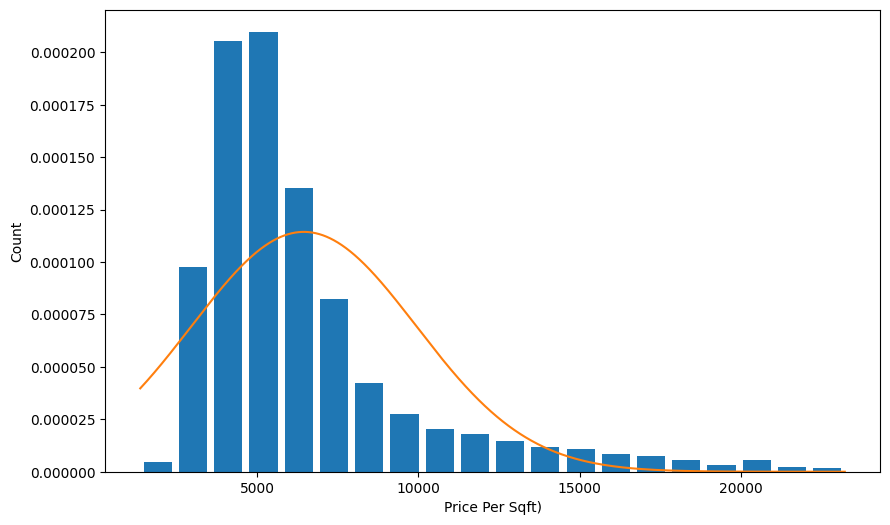

In [18]:
from scipy.stats import norm
import numpy as np
plt.hist(df_no_outliers_2["price_per_sqft"], bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Sqft)')
plt.ylabel('Count')

rng = np.arange(df_no_outliers_2["price_per_sqft"].min(), df_no_outliers_2["price_per_sqft"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_no_outliers_2["price_per_sqft"].mean(),df_no_outliers_2["price_per_sqft"].std()))

### This is a right skewed distribution

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [19]:
df_no_outliers_1["ppsqft_z_score"] = (df_no_outliers_1["price_per_sqft"] - df_no_outliers_1["price_per_sqft"].mean()) / df_no_outliers_1["price_per_sqft"].std()

/var/folders/r3/_d0_r97169g0lxpyj8681vgw0000gn/T/ipykernel_36508/2670696039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_1["ppsqft_z_score"] = (df_no_outliers_1["price_per_sqft"] - df_no_outliers_1["price_per_sqft"].mean()) / df_no_outliers_1["price_per_sqft"].std()


In [21]:
df_no_outliers_1.sample(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ppsqft_z_score
10197,other,3 BHK,1537.0,3.0,81.00,3,5270,-0.336548
8614,Harlur,2 BHK,1532.0,2.0,65.00,2,4242,-0.584796
10447,Ambedkar Nagar,3 BHK,1920.0,4.0,121.00,3,6302,-0.087334
1584,Hosa Road,2 BHK,1063.0,2.0,31.89,2,3000,-0.884722
4244,Bhoganhalli,3 BHK,1053.4,3.0,88.91,3,8440,0.428963
12201,Uttarahalli,2 BHK,1125.0,2.0,47.00,2,4177,-0.600493
9043,Dasanapura,3 BHK,1286.0,2.0,68.00,3,5287,-0.332443
7235,other,2 BHK,1110.0,2.0,52.00,2,4684,-0.478059
1071,other,4 Bedroom,1200.0,4.0,135.00,4,11250,1.107540
7724,Chamrajpet,3 BHK,1565.0,3.0,98.91,3,6320,-0.082988


In [23]:
df_outliers_by_z_score = df_no_outliers_1[(df_no_outliers_1["ppsqft_z_score"]>4) | (df_no_outliers_1["ppsqft_z_score"]<-4)]

df_outliers_by_z_score.shape

(125, 8)

We have 125 outliers when doing it this way, which lines up with our first analysis

In [26]:
df_no_outliers_by_z_score = df_no_outliers_1[(df_no_outliers_1["ppsqft_z_score"]<4) & (df_no_outliers_1["ppsqft_z_score"]>-4)]

df_no_outliers_by_z_score.shape

(13047, 8)

Same 13047 values as the other way!